In [1]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
from pdb import set_trace as breakpoint
from time import time

import numpy as np
import matplotlib.pyplot as plt
import h5py

from ..datasets.generators1d import * 
from ..models.utils import pbar, tensor_diff, tensor_roll

ValueError: attempted relative import beyond top-level package

## Cavity experiments

In [2]:
perms = np.ones(65)# perm_alternating_layers(s=65)
eps, src_x, _, _, Ez = Cavity1D(npml=0, cavity_buffer=0).solve(perms, omega=OMEGA_1550)

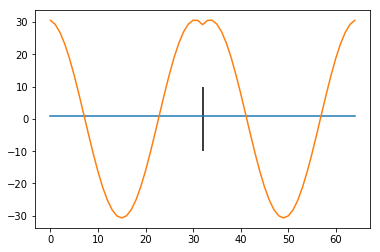

In [3]:
plt.plot(eps)
plt.plot(np.imag(Ez), label="$E_\mathrm{true}$")
plt.vlines(src_x, -10, 10)
plt.show()

In [8]:
a = torch.tensor(np.imag(Ez))
roll=tensor_roll(a, 1)
dif = tensor_diff(a, n=2, cyclic=True)
dif2 = tensor_diff(a, n=2, padding=None)

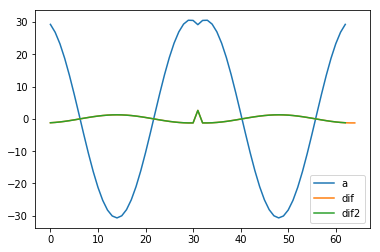

In [9]:
plt.plot(a[1:-1].numpy(), label='a')
# plt.plot(roll.numpy(), label='roll')
plt.plot(dif.numpy(), label='dif')
plt.plot(dif2.numpy(), label='dif2')
plt.legend()
plt.show()